### Modeling K-Nearest Neighbors, Decision Trees and Gradient Boosting Decision Trees.

#### Gradient Boosting performs the best: Accuracy of 71%, Precision of 53% and F1 of 42% (harmonic mean ratio of precision and recall).

In [2]:
import pickle
import pandas as pd
import numpy as np 

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=.3)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
with open('dataframes/df_master.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

In [5]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.000007,0.269,280213.0,0.993,0.134000,5.0,0.1950,-3.219,1.0,0.1710,87.795,3.0,0.221,0
1,0.277000,0.644,417560.0,0.501,0.000000,5.0,0.1310,-5.761,0.0,0.0299,116.032,4.0,0.374,0
2,0.140000,0.859,483967.0,0.440,0.537000,9.0,0.6890,-11.224,0.0,0.0514,121.002,4.0,0.739,1
3,0.689000,0.699,183027.0,0.519,0.000471,8.0,0.9350,-6.422,1.0,0.0290,102.463,4.0,0.664,0
4,0.179000,0.813,200705.0,0.683,0.000000,6.0,0.0748,-3.813,0.0,0.0285,107.950,4.0,0.685,0


### Use a stratified shuffle split, with minority class at 30%. 

In [6]:
X = df.iloc[:,:-1]

y = df['target']

for train_index, test_index in sss.split(X,y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.695236
 1    0.304764
 Name: target, dtype: float64, 0    0.695218
 1    0.304782
 Name: target, dtype: float64)

In [276]:
y_test.value_counts()

0    2646
1    1160
Name: target, dtype: int64

### Compare K-Nearest Neighbors

In [270]:
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)
    knn_precision = precision_score(y_test, y_pred)
    knn_recall = recall_score(y_test, y_pred)
    knn_f1 = f1_score(y_test, y_pred)
    print('KNN', k)
    print('Accuracy:', knn_accuracy)
    print('Precision:', knn_precision)
    print('Recall:', knn_recall)
    print('F1:', knn_f1)

KNN 1
Accuracy: 0.614555964267
Precision: 0.370025402202
Recall: 0.376724137931
F1: 0.373344724477
KNN 2
Accuracy: 0.668681029953
Precision: 0.39501039501
Recall: 0.163793103448
F1: 0.231566118221
KNN 3
Accuracy: 0.633736205991
Precision: 0.378881987578
Recall: 0.315517241379
F1: 0.344308560677
KNN 4
Accuracy: 0.667630057803
Precision: 0.387580299786
Recall: 0.156034482759
F1: 0.222495390289
KNN 5
Accuracy: 0.640830267998
Precision: 0.371428571429
Recall: 0.25775862069
F1: 0.304325699746
KNN 6
Accuracy: 0.669994745139
Precision: 0.392857142857
Recall: 0.151724137931
F1: 0.218905472637
KNN 7
Accuracy: 0.654230162901
Precision: 0.384272997033
Recall: 0.223275862069
F1: 0.282442748092
KNN 8
Accuracy: 0.667630057803
Precision: 0.374701670644
Recall: 0.135344827586
F1: 0.198860037999
KNN 9
Accuracy: 0.660010509721
Precision: 0.392282958199
Recall: 0.210344827586
F1: 0.273849607183
KNN 10
Accuracy: 0.672096689438
Precision: 0.388888888889
Recall: 0.13275862069
F1: 0.19794344473
KNN 11
Accura

### ROC Curve for KNN = 5 

AUC KNN=5 0.597194203352
Accuracy: 0.640830267998
Precision: 0.371428571429
Recall: 0.25775862069
F1: 0.304325699746
2140 506 861 299


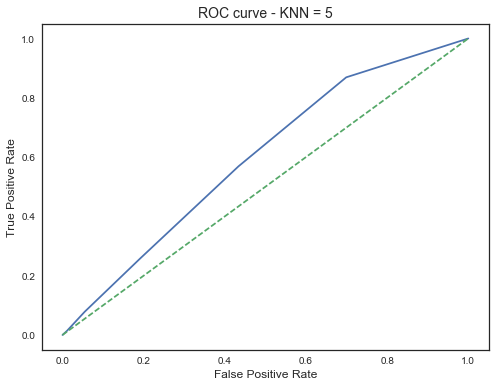

In [391]:
knn2_model = KNeighborsClassifier(n_neighbors=5)
knn2_model.fit(X_train, y_train)
knn2_y_pred = knn2_model.predict(X_test)

knn2_y_score = knn2_model.predict_proba(X_test)
knn2_roc_data = roc_curve(y_test, knn2_y_score[:,1])
fig, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(knn2_roc_data[0], knn2_roc_data[1])
ax2.plot(knn2_roc_data[0], knn2_roc_data[0], linestyle='dashed')
plt.title('ROC curve - KNN = 5', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
knn2_auc = auc(knn2_roc_data[0], knn2_roc_data[1])
print("AUC KNN=5", knn2_auc)
knn2_accuracy = accuracy_score(y_test, knn2_y_pred)
knn2_precision = precision_score(y_test, knn2_y_pred)
knn2_recall = recall_score(y_test, knn2_y_pred)
knn2_f1 = f1_score(y_test, knn2_y_pred)

print('Accuracy:', knn2_accuracy)
print('Precision:', knn2_precision)
print('Recall:', knn2_recall)
print('F1:', knn2_f1)

tn, fp, fn, tp = confusion_matrix(y_test, knn2_y_pred).ravel()
print(tn, fp, fn, tp)




### Confusion Matrix for KNN=5

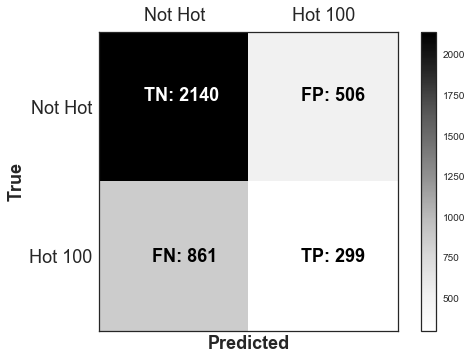

In [426]:
labels = ['Not Hot', 'Hot 100']
cm = confusion_matrix(y_test, knn2_y_pred)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=18)
ax.set_yticklabels([''] + labels, fontsize=18)
ax.annotate('TN: 2140', xy=(-.2, -.04), color='white', fontsize=18, fontweight='bold')
ax.annotate('FP: 506', xy=(.85, -.04), color='black', fontsize=18, fontweight='bold')
ax.annotate('TP: 299', xy=(.85, 1.04), color='black', fontsize=18, fontweight='bold')
ax.annotate('FN: 861', xy=(-.15, 1.04), color='black', fontsize=18, fontweight='bold')
plt.xlabel('Predicted', fontsize=18, fontweight='bold')
plt.ylabel('True', fontsize=18, fontweight='bold')

plt.savefig("knn_confusion_matrix.png");

In [160]:
import seaborn as sns
sns.set_style('white')

### Compare results with Decision Tree Classifier

In [402]:
from sklearn.metrics import confusion_matrix

dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_y_pred = dtc_model.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
dtc_precision = precision_score(y_test, dtc_y_pred)
dtc_recall = recall_score(y_test, dtc_y_pred)
dtc_f1 = f1_score(y_test, dtc_y_pred)
print('DECISION TREE SCORES')
print('Accuracy:', dtc_accuracy)
print('Precision:', dtc_precision)
print('Recall:', dtc_recall)
print('F1:', dtc_f1)
tn, fp, fn, tp = confusion_matrix(y_test, dtc_y_pred).ravel()
print(tn, fp, fn, tp)



DECISION TREE SCORES
Accuracy: 0.639779295849
Precision: 0.410212765957
Recall: 0.415517241379
F1: 0.412847965739
1953 693 678 482


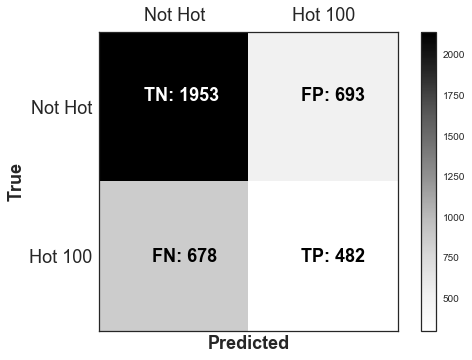

In [427]:
labels = ['Not Hot', 'Hot 100']
cm_dtc = confusion_matrix(y_test, dtc_y_pred)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, fontsize=18)
ax.set_yticklabels([''] + labels, fontsize=18)
plt.xlabel('Predicted', fontsize=18, fontweight='bold' )
plt.ylabel('True', fontsize=18, fontweight='bold')
ax.annotate('TN: 1953', xy=(-.2, -.04), color='white', fontsize=18, fontweight='bold')
ax.annotate('FP: 693', xy=(.85, -.04), color='black', fontsize=18, fontweight='bold')
ax.annotate('TP: 482', xy=(.85, 1.04), color='black', fontsize=18, fontweight='bold')
ax.annotate('FN: 678', xy=(-.15, 1.04), color='black', fontsize=18, fontweight='bold')
plt.savefig("dtc_confusion_matrix.png");

### The Winnner. Gradient Boosting Decision Trees with Grid Search optimization

In [47]:
param_grid = {'n_estimators': [10, 50 , 100 , 200, 250, 300, 350], 'loss':['deviance'],
             'max_depth': [3,4,5,6,7,8]}

gbc = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, scoring='recall')
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_y_pred)
gbc_precision = precision_score(y_test, gbc_y_pred)
gbc_recall = recall_score(y_test, gbc_y_pred)
gbc_f1 = f1_score(y_test, gbc_y_pred)
print('GRADIENT BOOSTING CLASSIFIER')
print('Accuracy:', gbc_accuracy)
print('Precision:', gbc_precision)
print('Recall:', gbc_recall)
print('F1:', dtc_f1)
gbc_y_score = gbc.predict_proba(X_test)


gbc_roc_data = roc_curve(y_test, gbc_y_score[:,1])


GRADIENT BOOSTING CLASSIFIER
Accuracy: 0.707304256437
Precision: 0.532033426184
Recall: 0.329310344828
F1: 0.42471042471


### Gradient Boosting Confusion Matrix

[[2310  336]
 [ 778  382]]


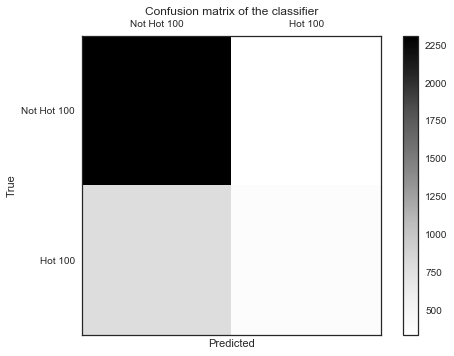

In [312]:
labels = ['Not Hot 100', 'Hot 100']
cm = confusion_matrix(y_test, gbc_y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Gradient Boosting ROC Curve

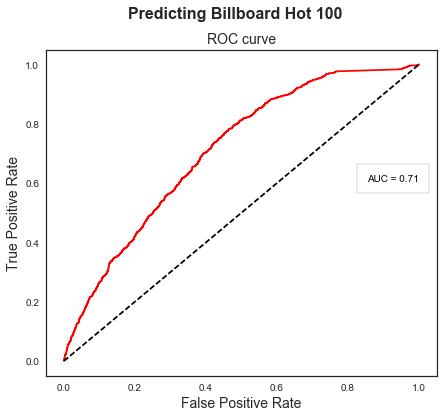

In [418]:

fig, ax = plt.subplots(figsize=(7,6))
ax.plot(gbc_roc_data[0], gbc_roc_data[1], color='r')
ax.plot(gbc_roc_data[0], gbc_roc_data[0], linestyle='dashed', color='black')
plt.suptitle('Predicting Billboard Hot 100', fontsize=16, fontweight='bold')
plt.title('ROC curve', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.text(1,0.6,'AUC = 0.71',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10, bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

plt.savefig("roc_gradientboosting.png");

In [193]:
gbc_auc = auc(gbc_roc_data[0], gbc_roc_data[1])
gbc_auc

0.70935569630150908

In [242]:
confusion = confusion_matrix(y_test, gbc_y_pred)
print(confusion)
tn, fp, fn, tp = confusion_matrix(y_test, gbc_y_pred).ravel()
tn, fp, fn, tp


[[2310  336]
 [ 778  382]]


(2310, 336, 778, 382)

In [243]:
y_test.value_counts()

0    2646
1    1160
Name: target, dtype: int64

In [54]:
sum(gbc_y_pred)

718

In [55]:
gbc.best_params_

{'loss': 'deviance', 'max_depth': 6, 'n_estimators': 350}

In [56]:
gbc.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=350, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [179]:
feature_importance = sorted(list(zip(X_test.columns,gbc.best_estimator_.feature_importances_)), key=lambda x: x[1])
feature_importance

[('time_signature', 0.0051426935156258348),
 ('mode', 0.0072545088887819315),
 ('key', 0.032807128807818442),
 ('instrumentalness', 0.077860100433247689),
 ('energy', 0.080782143548385282),
 ('liveness', 0.089152144492209789),
 ('valence', 0.08956578431053093),
 ('acousticness', 0.096534423747597548),
 ('danceability', 0.098070808397771547),
 ('duration_ms', 0.10201217069676033),
 ('loudness', 0.10365781369455888),
 ('speechiness', 0.10527189642707163),
 ('tempo', 0.11188838303964022)]

### Feature Importance of Gradient Boosting Classifier

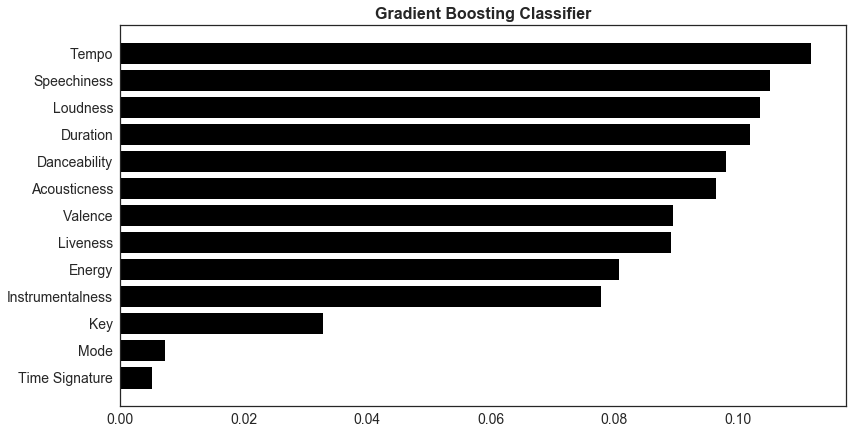

In [424]:
xlabels = ['Time Signature', 'Mode', 'Key', 'Instrumentalness', 'Energy', 'Liveness', 'Valence', 'Acousticness', 'Danceability', 'Duration', 'Loudness', 'Speechiness', 'Tempo']
ypos = np.arange(len(xlabels))
fig = plt.subplots(figsize=(13,7))
plt.barh(ypos, [t[1] for t in feature_importance]  , align="center", color='black')
plt.title('Gradient Boosting Classifier', fontsize=16, fontweight='bold')
plt.yticks(ypos, xlabels, fontsize=14);
plt.xticks(fontsize=14)
plt.savefig("feature_importance.png");

In [225]:
log_param_grid = {'C': [.1, .5, 1, 10, 100, 1000], 'random_state': [1]}

log_model = GridSearchCV(LogisticRegression(), param_grid=log_param_grid, scoring='recall')
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)
print('LOGISTIC REGRESSION SCORES')
print('Accuracy:', log_accuracy)
print('Precision:', log_precision)
print('Recall:', log_recall)
print('F1:', log_f1)

LOGISTIC REGRESSION SCORES
Accuracy: 0.695218076721
Precision: 0.0
Recall: 0.0
F1: 0.0


/Users/brianturner/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/brianturner/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [214]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier

gbc_voting = GradientBoostingClassifier(n_estimators=350, max_depth=6)
ada = AdaBoostClassifier()

vc = VotingClassifier(estimators=[('gradient boost', gbc_voting), ('adaboost', ada)], voting='hard')
vc.fit(X_train, y_train)
vc_y_pred = vc.predict(X_test)
vc_accuracy = accuracy_score(y_test, vc_y_pred)
vc_precision = precision_score(y_test, vc_y_pred)
vc_recall = recall_score(y_test, vc_y_pred)
vc_f1 = f1_score(y_test, vc_y_pred)
print('Voting Classifiter SCORES')
print('Accuracy:', vc_accuracy)
print('Precision:', vc_precision)
print('Recall:', vc_recall)
print('F1:', vc_f1)


Voting Classifiter SCORES
Accuracy: 0.700472937467
Precision: 0.558139534884
Recall: 0.0827586206897
F1: 0.144144144144
